# 라이브러리

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

#개봉월 전처리
def get_month(x):
        return x[5:7]

#배급사 전처리
def get_dis(x) :
    if 'CJ' in x or 'CGV' in x :
        return 'CJ'
    elif '쇼박스' in x :
        return '쇼박스'
    elif 'SK' in x :
        return 'SK'
    elif '리틀빅' in x :
        return '리틀빅픽처스'
    elif '스폰지' in x :
        return '스폰지'
    elif '싸이더스' in x :
        return '싸이더스'
    elif '에이원' in x :
        return '에이원'
    elif '마인스' in x :
        return '마인스엔터'
    elif '마운틴' in x :
        return '마운틴픽처스'
    elif '디씨드' in x :
        return '디씨드'
    elif '드림팩트' in x :
        return '드림팩트'
    elif '메가박스' in x :
        return '메가박스'
    elif '마운틴' in x :
        return '마운틴'
    elif 'NEW' in x :
        return 'NEW'
    elif '롯데' in x :
        return '롯데엔터'
    elif '프리비젼' in x :
        return '프리비젼엔터'
    elif '타임스' in x :
        return '타임스토리'
    elif '마달'in x or '마 달' in x:
        return '시네마달'
    else :
        return x

# 불러오기

In [3]:
train = pd.read_csv('C:\\Users\\user\\workspace\\movie\\movies_train.csv')
test = pd.read_csv('C:\\Users\\user\\workspace\\movie\movies_test.csv')
submission = pd.read_csv('C:\\Users\\user\\workspace\\movie\\submission.csv')

# 1. 배급사 전처리

In [4]:
train['distributor'] = train.distributor.str.replace("(주)", '')
test['distributor'] = test.distributor.str.replace("(주)", '')
train['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in train.distributor]
test['distributor'] = [re.sub(r'[^0-9a-zA-Z가-힣]', '', x) for x in test.distributor]
train['distributor'] = train.distributor.apply(get_dis)
test['distributor'] = test.distributor.apply(get_dis)

C:\Users\user\AppData\Local\Temp/ipykernel_25268/768766398.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['distributor'] = train.distributor.str.replace("(주)", '')
C:\Users\user\AppData\Local\Temp/ipykernel_25268/768766398.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test['distributor'] = test.distributor.str.replace("(주)", '')


### 배급사 중위값으로 랭크 생성

In [5]:
dis_medi_rank = train.groupby('distributor').box_off_num.median().reset_index(name = 'dis_medi_rank').sort_values(by = 'dis_medi_rank')
dis_medi_rank['dis_medi_rank'] = [i + 1 for i in range(dis_medi_rank.shape[0])]
dis_medi_rank

,distributor,dis_medi_rank
110,인피니티엔터테인먼트,1
15,고구마공작소,2
52,사람과사람들,3
97,위드시네마,4
19,나우콘텐츠,5
...,...,...
113,전망좋은영화사,143
105,이십세기폭스코리아,144
56,쇼박스,145
84,영구아트무비,146


### 배급사 평균값으로 랭크 생성

In [6]:
dis_mean_rank = train.groupby('distributor').box_off_num.mean().reset_index(name = 'dis_mean_rank').sort_values(by = 'dis_mean_rank')
dis_mean_rank['dis_mean_rank'] = [i + 1 for i in range(dis_mean_rank.shape[0])]
dis_mean_rank

,distributor,dis_mean_rank
110,인피니티엔터테인먼트,1
15,고구마공작소,2
52,사람과사람들,3
97,위드시네마,4
19,나우콘텐츠,5
...,...,...
7,NEW,143
1,CJ,144
84,영구아트무비,145
75,아이필름코퍼레이션,146


### 배급사 관객수 합 변수 생성

In [7]:
dis_sum = train.groupby('distributor').box_off_num.sum().reset_index(name = 'dis_sum')
dis_sum

,distributor,dis_sum
0,BoXoo엔터테인먼트,93432
1,CJ,140522374
2,JK필름,688639
3,KBS미디어,7956
4,KT,807835
...,...,...
142,하준사,600
143,한국YWCA연합회,71
144,홀리가든,6886
145,화앤담이엔티,344393


### 배급사 MERGE

In [8]:
#중위값 merge
train = pd.merge(train, dis_medi_rank, how = 'left')
test = pd.merge(test, dis_medi_rank, how = 'left')
#평균값 merge
train = pd.merge(train, dis_mean_rank, how = 'left')
test = pd.merge(test, dis_mean_rank, how = 'left')
#합 merge
train = pd.merge(train, dis_sum, how = 'left')
test = pd.merge(test, dis_sum, how = 'left')

# 2. 장르 전처리

### 장르 평균값 순위 확인

In [9]:
train.groupby('genre').box_off_num.mean().sort_values()

genre
뮤지컬       6.627000e+03
다큐멘터리     6.717226e+04
서스펜스      8.261100e+04
애니메이션     1.819267e+05
멜로/로맨스    4.259680e+05
미스터리      5.275482e+05
공포        5.908325e+05
드라마       6.256898e+05
코미디       1.193914e+06
SF        1.788346e+06
액션        2.203974e+06
느와르       2.263695e+06
Name: box_off_num, dtype: float64

### 장르 중위값 순위 확인

In [10]:
train.groupby('genre').box_off_num.median().sort_values()

genre
다큐멘터리        3044.0
미스터리         3199.0
멜로/로맨스       3653.0
뮤지컬          4778.0
드라마          7173.0
SF           9323.0
애니메이션       23802.0
서스펜스        82611.0
공포         179810.0
코미디        210775.0
액션        1147846.5
느와르       1646142.0
Name: box_off_num, dtype: float64

### 장르 평균값 순위 맵핑

In [11]:
train['gr_mean_rank'] = train.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})
test['gr_mean_rank'] = test.genre.map({'뮤지컬' : 1, '다큐멘터리' : 2, '서스펜스' : 3, '애니메이션' : 4, '멜로/로맨스' : 5,
                                      '미스터리' : 6, '공포' : 7, '드라마' : 8, '코미디' : 9, 'SF' : 10, '액션' : 11, '느와르' : 12})

### 장르 중위값 순위 맵핑

In [12]:
train['gr_medi_rank'] = train.genre.map({'다큐멘터리' : 1, '미스터리' : 2, '멜로/로맨스' : 3, '뮤지컬' : 4, '드라마' : 5,
                                      'SF' : 6, '애니메이션' : 7, '서스펜스' : 8, '공포' : 9, '코미디' : 10, '액션' : 11, '느와르' : 12})
test['gr_medi_rank'] = test.genre.map({'뮤지컬' : 1, '미스터리' : 2, '멜로/로맨스' : 3, '뮤지컬' : 4, '드라마' : 5,
                                      'SF' : 6, '애니메이션' : 7, '서스펜스' : 8, '공포' : 9, '코미디' : 10, '액션' : 11, '느와르' : 12})

# 3. 개봉월 전처리

In [13]:
month = train.release_time.apply(get_month)
train['month'] = month
month = test.release_time.apply(get_month)
test['month'] = month

### 개봉월 중위값 순위 확인

In [14]:
train.groupby('month').box_off_num.median().sort_values()

month
03      4110.5
05      7448.0
04      7956.0
07      9301.0
12      9323.0
02     10203.0
09     14931.0
11     15813.0
08     16248.0
06     18343.0
10     45112.0
01    283449.0
Name: box_off_num, dtype: float64

### 개봉월 평균값 순위 확인

In [15]:
train.groupby('month').box_off_num.mean().sort_values()

month
04    2.581667e+05
03    2.738874e+05
10    3.859042e+05
11    4.956539e+05
06    5.122865e+05
05    5.756852e+05
02    6.630252e+05
09    7.315286e+05
08    1.029162e+06
07    1.113807e+06
12    1.288248e+06
01    1.365931e+06
Name: box_off_num, dtype: float64

### 개봉월 관객수 합 변수 생성

In [16]:
month_sum = train.groupby('month').box_off_num.sum().reset_index(name = 'month_sum')
month_sum

,month,month_sum
0,01,53271292
1,02,20553781
2,03,14242143
3,04,12133835
4,05,32814059
5,06,14856308
6,07,54576555
7,08,56603892
8,09,43891718
9,10,23154249


### 개봉월 MERGE

In [17]:
#합 merge
train = pd.merge(train, month_sum, how = 'left')
test = pd.merge(test, month_sum, how = 'left')

### 개봉월 평균값 순위 맵핑

In [18]:
train['month_mean_rank'] = train.month.map({'04' : 1, '03' : 2, '10' : 3, '11' : 4, '06' : 5,
                                      '05' : 6, '02' : 7, '09' : 8, '08' : 9, '07' : 10, '12' : 11, '01' : 12})
test['month_mean_rank'] = test.month.map({'04' : 1, '03' : 2, '10' : 3, '11' : 4, '06' : 5,
                                      '05' : 6, '02' : 7, '09' : 8, '08' : 9, '07' : 10, '12' : 11, '01' : 12})

### 개봉월 중위값 순위 맵핑

In [19]:
train['month_medi_rank'] = train.month.map({'03' : 1, '04' : 2, '12' : 3, '07' : 4, '05' : 5,
                                      '02' : 6, '11' : 7, '09' : 8, '08' : 9, '06' : 10, '10' : 11, '01' : 12})
test['month_medi_rank'] = test.month.map({'03' : 1, '04' : 2, '12' : 3, '07' : 4, '05' : 5,
                                      '02' : 6, '11' : 7, '09' : 8, '08' : 9, '06' : 10, '10' : 11, '01' : 12})

# 4. 상영시간 그대로 사용
# 5. 영상등급은 모델 설정시 원핫인코딩
# 6. 스태프수 그대로 사용

# 7. 데이터 스케일링

### 배급사, 장르, 월, 스태프 수, 상영시간 스케일링

In [20]:
dis_medi_norm = train.groupby('distributor').box_off_num.median().reset_index(name = 'dis_medi_norm').sort_values(by = 'dis_medi_norm')
dis_mean_norm = train.groupby('distributor').box_off_num.mean().reset_index(name = 'dis_mean_norm').sort_values(by = 'dis_mean_norm')
gr_medi_norm = train.groupby('genre').box_off_num.median().reset_index(name = 'gr_medi_norm').sort_values(by = 'gr_medi_norm')
gr_mean_norm = train.groupby('genre').box_off_num.mean().reset_index(name = 'gr_mean_norm').sort_values(by = 'gr_mean_norm')
month_medi_norm = train.groupby('month').box_off_num.median().reset_index(name = 'month_medi_norm').sort_values(by = 'month_medi_norm')
month_mean_norm = train.groupby('month').box_off_num.mean().reset_index(name = 'month_mean_norm').sort_values(by = 'month_mean_norm')

In [21]:
train = pd.merge(train, dis_medi_norm, how = 'left')
train = pd.merge(train, dis_mean_norm, how = 'left')
train = pd.merge(train, gr_medi_norm, how = 'left')
train = pd.merge(train, gr_mean_norm, how = 'left')
train = pd.merge(train, month_medi_norm, how = 'left')
train = pd.merge(train, month_mean_norm, how = 'left')

test = pd.merge(test, dis_medi_norm, how = 'left')
test = pd.merge(test, dis_mean_norm, how = 'left')
test = pd.merge(test, gr_medi_norm, how = 'left')
test = pd.merge(test, gr_mean_norm, how = 'left')
test = pd.merge(test, month_medi_norm, how = 'left')
test = pd.merge(test, month_mean_norm, how = 'left')

In [22]:
from sklearn.preprocessing import minmax_scale, StandardScaler, MinMaxScaler

train['dis_mean_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['dis_mean_norm']]).transform(train[['dis_mean_norm']])
train['dis_medi_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['dis_medi_norm']]).transform(train[['dis_medi_norm']])
train['gr_mean_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['gr_mean_norm']]).transform(train[['gr_mean_norm']])
train['gr_medi_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['gr_medi_norm']]).transform(train[['gr_medi_norm']])
train['month_mean_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['month_mean_norm']]).transform(train[['month_mean_norm']])
train['month_medi_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['month_medi_norm']]).transform(train[['month_medi_norm']])
train['num_staff_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['num_staff']]).transform(train[['num_staff']])
train['time_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['time']]).transform(train[['time']])
train['dis_sum_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['dis_sum']]).transform(train[['dis_sum']])
train['dir_prev_bfnum_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['dir_prev_bfnum']]).transform(train[['dir_prev_bfnum']])
train['month_sum_norm'] = MinMaxScaler(feature_range=[0,1]).fit(train[['month_sum']]).transform(train[['month_sum']])

In [23]:
test['dis_mean_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['dis_mean_norm']]).transform(test[['dis_mean_norm']])
test['dis_medi_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['dis_medi_norm']]).transform(test[['dis_medi_norm']])
test['gr_mean_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['gr_mean_norm']]).transform(test[['gr_mean_norm']])
test['gr_medi_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['gr_medi_norm']]).transform(test[['gr_medi_norm']])
test['month_mean_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['month_mean_norm']]).transform(test[['month_mean_norm']])
test['month_medi_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['month_medi_norm']]).transform(test[['month_medi_norm']])
test['num_staff_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['num_staff']]).transform(test[['num_staff']])
test['time_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['time']]).transform(test[['time']])
test['dis_sum_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['dis_sum']]).transform(test[['dis_sum']])
test['dir_prev_bfnum_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['dir_prev_bfnum']]).transform(test[['dir_prev_bfnum']])
test['month_sum_norm'] = MinMaxScaler(feature_range=[0,1]).fit(test[['month_sum']]).transform(test[['month_sum']])

# 데이터 확인

In [24]:
test = test.fillna(0)
train = train.fillna(0)

In [25]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,dis_medi_rank,dis_mean_rank,dis_sum,gr_mean_rank,...,dis_mean_norm,gr_medi_norm,gr_mean_norm,month_medi_norm,month_mean_norm,num_staff_norm,time_norm,dis_sum_norm,dir_prev_bfnum_norm,month_sum_norm
count,600.000000,6.000000e+02,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000,6.000000e+02,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,100.863333,4.726993e+05,0.876667,151.118333,3.706667,7.081818e+05,93.520000,102.576667,3.098719e+07,6.790000,...,0.212478,0.097884,0.310826,0.101406,0.406237,0.173899,0.413802,0.220514,0.026835,0.474578
std,18.097528,1.309474e+06,1.183409,165.654671,2.446889,1.828006e+06,43.390138,39.472618,4.891525e+07,2.801603,...,0.293144,0.245787,0.263436,0.240284,0.325977,0.190627,0.134056,0.348096,0.074337,0.334105
min,45.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000,1.000000,2.000000e+00,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,89.000000,0.000000e+00,0.000000,17.000000,2.000000,1.297250e+03,53.750000,76.000000,3.529300e+04,5.000000,...,0.001563,0.000371,0.185790,0.013766,0.115311,0.019563,0.325926,0.000251,0.000000,0.165128
50%,100.000000,0.000000e+00,0.000000,82.500000,3.000000,1.259100e+04,99.000000,107.000000,3.037420e+05,8.000000,...,0.008638,0.002513,0.274277,0.038736,0.286630,0.094937,0.407407,0.002162,0.000000,0.461916
75%,114.000000,3.761416e+05,2.000000,264.000000,4.000000,4.798868e+05,134.250000,141.000000,6.438374e+07,8.000000,...,0.371487,0.063214,0.274277,0.043451,0.695992,0.303797,0.511111,0.458174,0.021353,0.832368
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07,147.000000,147.000000,1.405224e+08,12.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 학습데이터 설정

변수 정리 (12개 계획)

배급사
1. 중위값 랭크 'dis_medi_rank'
2. 평균값 랭크 'dis_mean_rank'
3. 중위값 스케일링 'dis_medi_norm'
4. 평균값 스케일링 'dis_mean_norm'

장르
5. 중위값 랭크 'gr_medi_rank'
6. 평균값 랭크 'gr_mean_rank'
7. 중위값 스케일링 'gr_medi_norm'
8. 평균값 스케일링 'gr_mean_norm'


개봉월
9. 중위값 랭크 'month_medi_rank'
10. 평균값 랭크 'month_mean_rank'
11. 중위값 스케일링 'month_medi_norm'
12. 평균값 스케일링 'month_mean_norm'


상영시간
13. 전처리 없이 'time'
14. 스케일링 'time_norm'

스태프 수
15. 전처리 없이 'num_staff'
16. 스케일링 'num_staff_norm'

상영등급
17. 원핫인코딩 'screening_rat'
- 학습데이터 = pd.get_dummies(columns = ['screening_rat'], data = 학습데이터)

=============================


감독 이전 관객수
18. 기본값 'dir_prev_bfnum'

감독 이전 영화수
19. 기본값 'dir_prev_num'

In [26]:
#####학습 변수#####
X = train[['dis_sum','dis_sum_norm','gr_mean_norm','gr_mean_rank','month_mean_norm','dir_prev_num','dir_prev_bfnum','time','num_staff']]

#####예측 값#####
y = train['box_off_num']
#로그를 씌우고 싶다면
y = np.log1p(train.box_off_num)


target = test[['dis_sum','dis_sum_norm','gr_mean_norm','gr_mean_rank','month_mean_norm','dir_prev_num','dir_prev_bfnum','time','num_staff']]

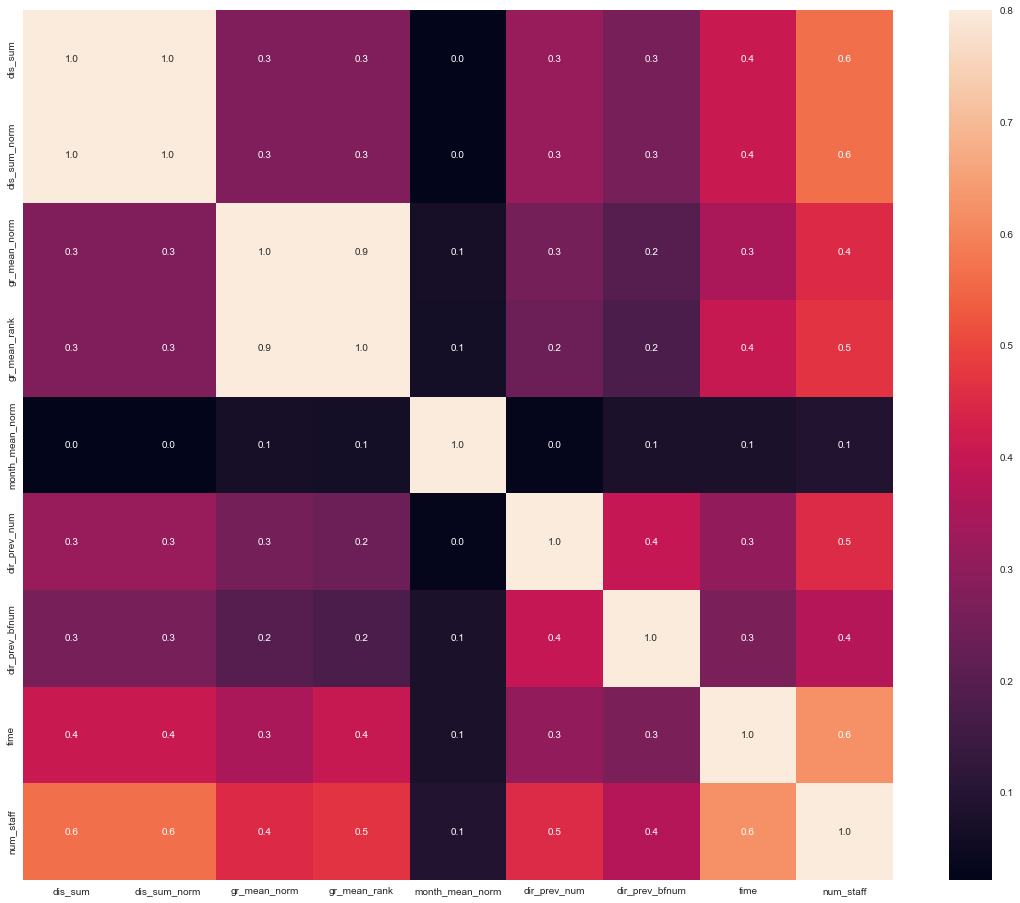

In [59]:
plt.style.use('seaborn')
def draw_corrmat(df):
  y_corrmat = df.corr()
  f, ax = plt.subplots(figsize=(20,16))
  sns.heatmap(y_corrmat, vmax=.8, annot=True, fmt='.1f', square=True);
  
draw_corrmat(X)

# 모델 설정

In [28]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor
from math import sqrt
from lightgbm import LGBMRegressor
from ngboost import NGBRegressor
from catboost import CatBoostRegressor

In [29]:
kf = KFold(n_splits =  5, shuffle = True, random_state = 42)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121)

In [31]:
hyper_parameter = {
    'alpha' : [0.01, 0.1, 1, 10],
    'max_iter' : [100, 500, 1000, 1500, 2000]
}

In [32]:
lasso_model = Lasso(alpha=0.001, max_iter=1000, normalize=True)

In [33]:
hyper_parameter_tuner = GridSearchCV(lasso_model, hyper_parameter, cv=kf)
hyper_parameter_tuner.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(alpha=0.001, normalize=True),
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'max_iter': [100, 500, 1000, 1500, 2000]})

In [34]:
hyper_parameter_tuner.best_params_

{'alpha': 0.01, 'max_iter': 100}

In [35]:
xgb = XGBRegressor(random_state = 42, alpha=0.01, max_iter=100)
gbr = GradientBoostingRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
ada = AdaBoostRegressor(n_estimators=100)
lgb = LGBMRegressor(random_state=42)
ngb = NGBRegressor(random_state=42)
cat = CatBoostRegressor(random_state=42)

In [36]:
xgb.fit(X_train, y_train)

[14:44:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_iter" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(alpha=0.01, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, max_iter=100, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=6,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0.00999999978, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [37]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [38]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, random_state=42)

In [39]:
ada.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100)

In [40]:
lgb.fit(X_train, y_train)

LGBMRegressor(random_state=42)

In [41]:
ngb.fit(X_train, y_train)

[iter 0] loss=2.5964 val_loss=0.0000 scale=1.0000 norm=2.8588
[iter 100] loss=2.1096 val_loss=0.0000 scale=2.0000 norm=3.2777
[iter 200] loss=1.7080 val_loss=0.0000 scale=2.0000 norm=2.4525
[iter 300] loss=1.5416 val_loss=0.0000 scale=1.0000 norm=1.1461
[iter 400] loss=1.4647 val_loss=0.0000 scale=1.0000 norm=1.1079


NGBRegressor(random_state=RandomState(MT19937) at 0x195EBCA6540)

In [42]:
cat.fit(X_train, y_train)

Learning rate set to 0.03646
0:	learn: 3.1730561	total: 154ms	remaining: 2m 33s
1:	learn: 3.1052876	total: 155ms	remaining: 1m 17s
2:	learn: 3.0392604	total: 156ms	remaining: 51.8s
3:	learn: 2.9781242	total: 157ms	remaining: 39s
4:	learn: 2.9145438	total: 158ms	remaining: 31.4s
5:	learn: 2.8599694	total: 158ms	remaining: 26.2s
6:	learn: 2.8007577	total: 159ms	remaining: 22.6s
7:	learn: 2.7513289	total: 161ms	remaining: 20s
8:	learn: 2.6958816	total: 162ms	remaining: 17.8s
9:	learn: 2.6474135	total: 163ms	remaining: 16.1s
10:	learn: 2.6020121	total: 164ms	remaining: 14.8s
11:	learn: 2.5551841	total: 165ms	remaining: 13.6s
12:	learn: 2.5135467	total: 166ms	remaining: 12.6s
13:	learn: 2.4698675	total: 168ms	remaining: 11.8s
14:	learn: 2.4343944	total: 170ms	remaining: 11.1s
15:	learn: 2.3966813	total: 171ms	remaining: 10.5s
16:	learn: 2.3627587	total: 172ms	remaining: 9.96s
17:	learn: 2.3266095	total: 173ms	remaining: 9.45s
18:	learn: 2.2911555	total: 174ms	remaining: 8.99s
19:	learn: 2.2

236:	learn: 1.2376822	total: 477ms	remaining: 1.54s
237:	learn: 1.2361342	total: 478ms	remaining: 1.53s
238:	learn: 1.2357453	total: 479ms	remaining: 1.52s
239:	learn: 1.2350224	total: 481ms	remaining: 1.52s
240:	learn: 1.2318113	total: 483ms	remaining: 1.52s
241:	learn: 1.2311507	total: 485ms	remaining: 1.52s
242:	learn: 1.2304989	total: 487ms	remaining: 1.52s
243:	learn: 1.2295714	total: 488ms	remaining: 1.51s
244:	learn: 1.2291364	total: 489ms	remaining: 1.51s
245:	learn: 1.2270221	total: 490ms	remaining: 1.5s
246:	learn: 1.2244879	total: 491ms	remaining: 1.5s
247:	learn: 1.2236310	total: 492ms	remaining: 1.49s
248:	learn: 1.2219417	total: 494ms	remaining: 1.49s
249:	learn: 1.2198401	total: 495ms	remaining: 1.48s
250:	learn: 1.2179129	total: 496ms	remaining: 1.48s
251:	learn: 1.2155374	total: 498ms	remaining: 1.48s
252:	learn: 1.2141151	total: 499ms	remaining: 1.47s
253:	learn: 1.2137497	total: 500ms	remaining: 1.47s
254:	learn: 1.2120442	total: 503ms	remaining: 1.47s
255:	learn: 1.

482:	learn: 0.8846444	total: 799ms	remaining: 855ms
483:	learn: 0.8839561	total: 801ms	remaining: 854ms
484:	learn: 0.8818538	total: 802ms	remaining: 852ms
485:	learn: 0.8803697	total: 803ms	remaining: 849ms
486:	learn: 0.8802227	total: 804ms	remaining: 847ms
487:	learn: 0.8794778	total: 806ms	remaining: 845ms
488:	learn: 0.8784540	total: 807ms	remaining: 843ms
489:	learn: 0.8762594	total: 808ms	remaining: 841ms
490:	learn: 0.8743927	total: 809ms	remaining: 839ms
491:	learn: 0.8734974	total: 810ms	remaining: 837ms
492:	learn: 0.8721027	total: 812ms	remaining: 835ms
493:	learn: 0.8714307	total: 814ms	remaining: 833ms
494:	learn: 0.8706376	total: 815ms	remaining: 831ms
495:	learn: 0.8695909	total: 816ms	remaining: 829ms
496:	learn: 0.8681833	total: 817ms	remaining: 827ms
497:	learn: 0.8676215	total: 821ms	remaining: 828ms
498:	learn: 0.8664680	total: 824ms	remaining: 827ms
499:	learn: 0.8660303	total: 826ms	remaining: 826ms
500:	learn: 0.8651786	total: 827ms	remaining: 824ms
501:	learn: 

694:	learn: 0.7015723	total: 1.12s	remaining: 490ms
695:	learn: 0.7007626	total: 1.12s	remaining: 489ms
696:	learn: 0.6996945	total: 1.12s	remaining: 487ms
697:	learn: 0.6994465	total: 1.12s	remaining: 485ms
698:	learn: 0.6987601	total: 1.12s	remaining: 483ms
699:	learn: 0.6979891	total: 1.12s	remaining: 481ms
700:	learn: 0.6972323	total: 1.13s	remaining: 480ms
701:	learn: 0.6965854	total: 1.13s	remaining: 478ms
702:	learn: 0.6961804	total: 1.13s	remaining: 477ms
703:	learn: 0.6954253	total: 1.13s	remaining: 477ms
704:	learn: 0.6952325	total: 1.14s	remaining: 475ms
705:	learn: 0.6939932	total: 1.14s	remaining: 473ms
706:	learn: 0.6933529	total: 1.14s	remaining: 472ms
707:	learn: 0.6927649	total: 1.14s	remaining: 470ms
708:	learn: 0.6924194	total: 1.14s	remaining: 468ms
709:	learn: 0.6916263	total: 1.14s	remaining: 466ms
710:	learn: 0.6910815	total: 1.14s	remaining: 464ms
711:	learn: 0.6905002	total: 1.14s	remaining: 462ms
712:	learn: 0.6899289	total: 1.14s	remaining: 460ms
713:	learn: 

918:	learn: 0.5643425	total: 1.44s	remaining: 127ms
919:	learn: 0.5638655	total: 1.44s	remaining: 125ms
920:	learn: 0.5632044	total: 1.44s	remaining: 123ms
921:	learn: 0.5625508	total: 1.44s	remaining: 122ms
922:	learn: 0.5625219	total: 1.44s	remaining: 120ms
923:	learn: 0.5620792	total: 1.44s	remaining: 118ms
924:	learn: 0.5616171	total: 1.44s	remaining: 117ms
925:	learn: 0.5614232	total: 1.44s	remaining: 115ms
926:	learn: 0.5607487	total: 1.45s	remaining: 114ms
927:	learn: 0.5603556	total: 1.45s	remaining: 112ms
928:	learn: 0.5594187	total: 1.45s	remaining: 111ms
929:	learn: 0.5590654	total: 1.45s	remaining: 109ms
930:	learn: 0.5588340	total: 1.45s	remaining: 108ms
931:	learn: 0.5583236	total: 1.45s	remaining: 106ms
932:	learn: 0.5582904	total: 1.45s	remaining: 104ms
933:	learn: 0.5579071	total: 1.45s	remaining: 103ms
934:	learn: 0.5568678	total: 1.45s	remaining: 101ms
935:	learn: 0.5568376	total: 1.46s	remaining: 99.5ms
936:	learn: 0.5561459	total: 1.47s	remaining: 98.9ms
937:	learn

In [43]:
xg_pred = xgb.predict(X_test)
gbr_pred = gbr.predict(X_test)
rf_pred = rf.predict(X_test)
ada_pred = ada.predict(X_test)
lgb_pred = lgb.predict(X_test)
ngb_pred = ngb.predict(X_test)
cat_pred = cat.predict(X_test)

In [62]:
ms1 = mean_squared_error(y_test, xg_pred) ** 0.5
ms2 = mean_squared_error(y_test, gbr_pred) ** 0.5
ms3 = mean_squared_error(y_test, rf_pred) ** 0.5
ms4 = mean_squared_error(y_test, ada_pred) ** 0.5
ms5 = mean_squared_error(y_test, lgb_pred) ** 0.5
ms6 = mean_squared_error(y_test, ngb_pred) ** 0.5
ms7 = mean_squared_error(y_test, cat_pred) ** 0.5

In [92]:
am = ms1, ms2, ms3, ms4, ms5, ms6, ms7 / 7

In [93]:
am

(1.5708469730091057,
 1.4241646313271805,
 1.3879613849322596,
 1.6907300928370055,
 1.5337287209191663,
 1.3973493556997305,
 0.19363002105845686)

In [85]:
am.score(X_test, y_test)

AttributeError: 'tuple' object has no attribute 'score'

# Score

In [51]:
xgb.score(X_test, y_test) 

0.7985845358111746

In [52]:
gbr.score(X_test, y_test)

0.8344438018757437

In [53]:
rf.score(X_test, y_test) 

0.8427539228666171

In [54]:
ada.score(X_test, y_test)

0.7666683684528258

In [55]:
lgb.score(X_test, y_test)

0.8079907491062421

In [56]:
ngb.score(X_test, y_test)

1.704465166493891

In [57]:
cat.score(X_test, y_test)

0.8500430778500014

In [58]:
submission.to_csv('team2_movies_13.csv', index = False)